# LGM VIRTUAL INTERNSHIP
## DATA ANALYTICS

## TASK-1 Iris Flower Classification (Performing clusters using K-means)
### Author - Aditya Naranje

### Importing required libraries and dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
mapping = {"Iris-setosa":"Setosa", 
           "Iris-versicolor":"Versicolor",
           "Iris-virginica":"Virginica"}

In [6]:
data["Species"] = data["Species"].map(mapping)

### Plotting histogram for visulization of data distribution.

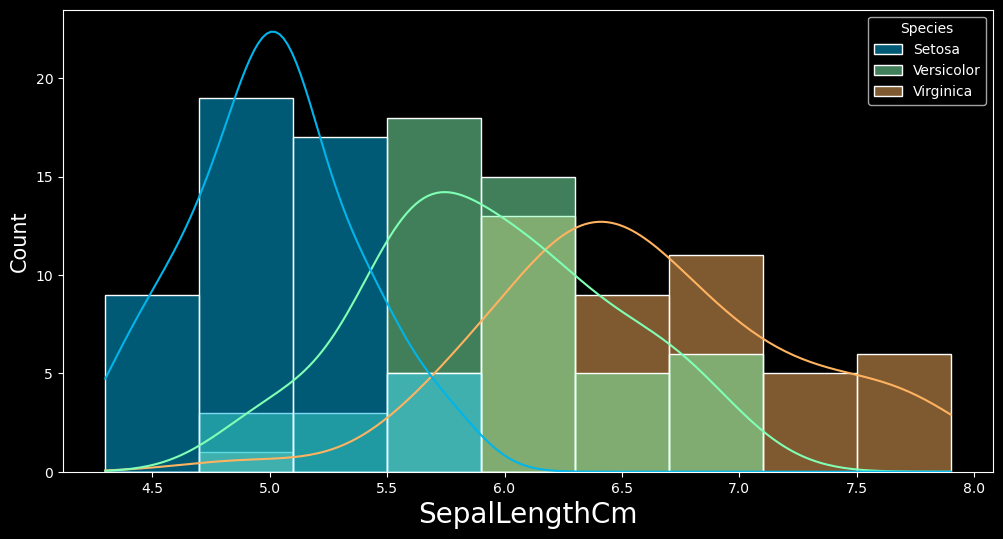

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data = data,x = data['SepalLengthCm'],hue='Species',palette='rainbow',kde=True)
plt.xlabel("SepalLengthCm",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

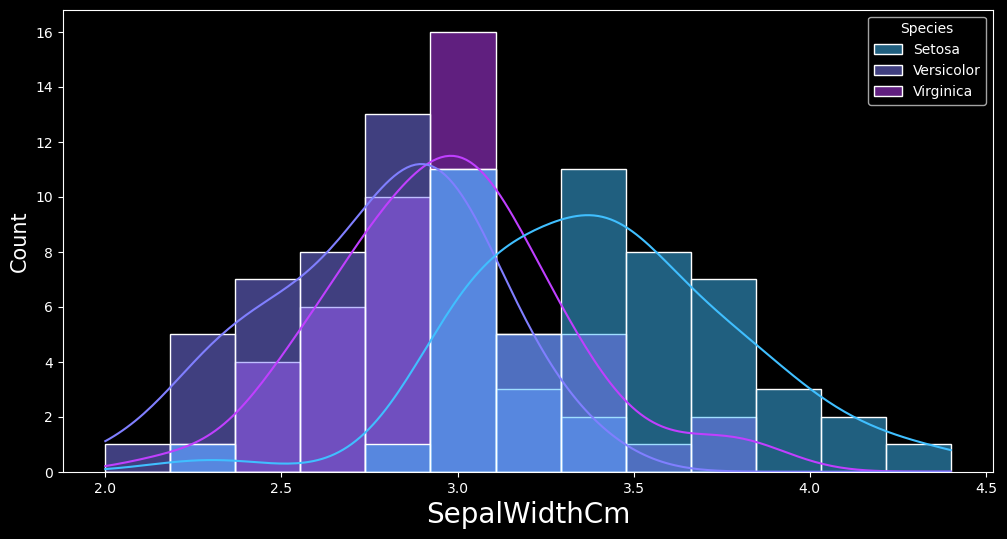

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data = data,x = data['SepalWidthCm'],hue='Species',palette='cool',kde=True)
plt.xlabel("SepalWidthCm",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

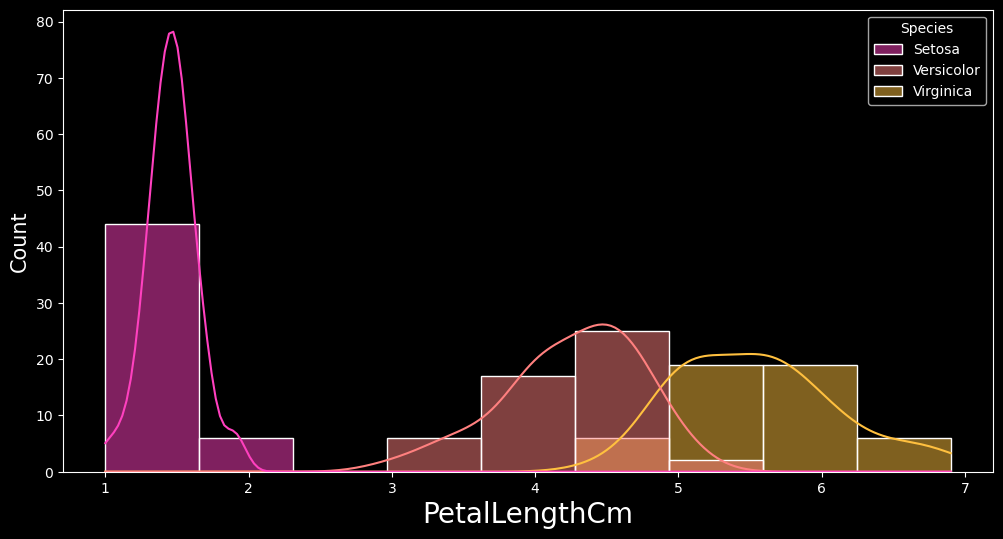

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(data = data,x = data['PetalLengthCm'],hue='Species',palette='spring',kde=True)
plt.xlabel("PetalLengthCm",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

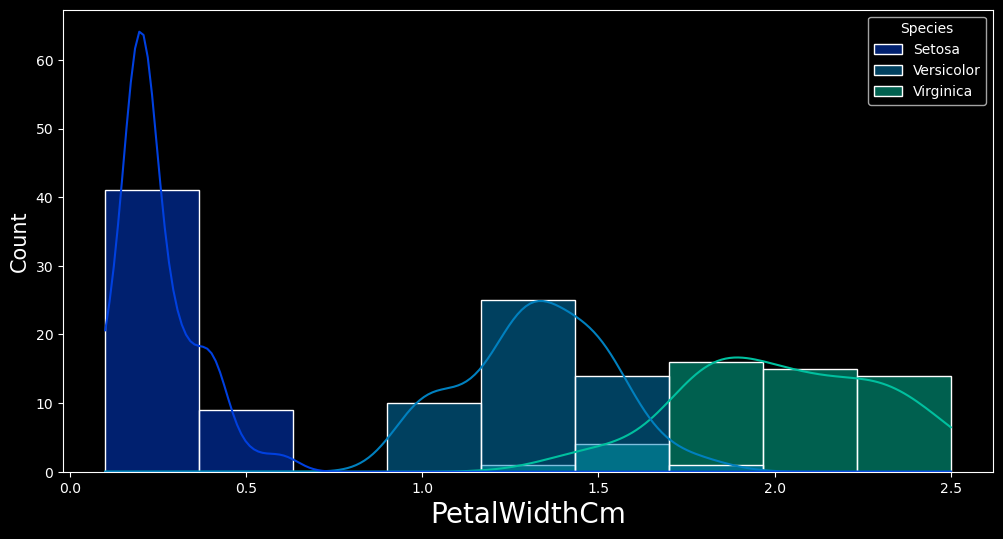

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(data = data,x = data['PetalWidthCm'],hue='Species',palette='winter',kde=True)
plt.xlabel("PetalWidthCm",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

### Scatterplot.

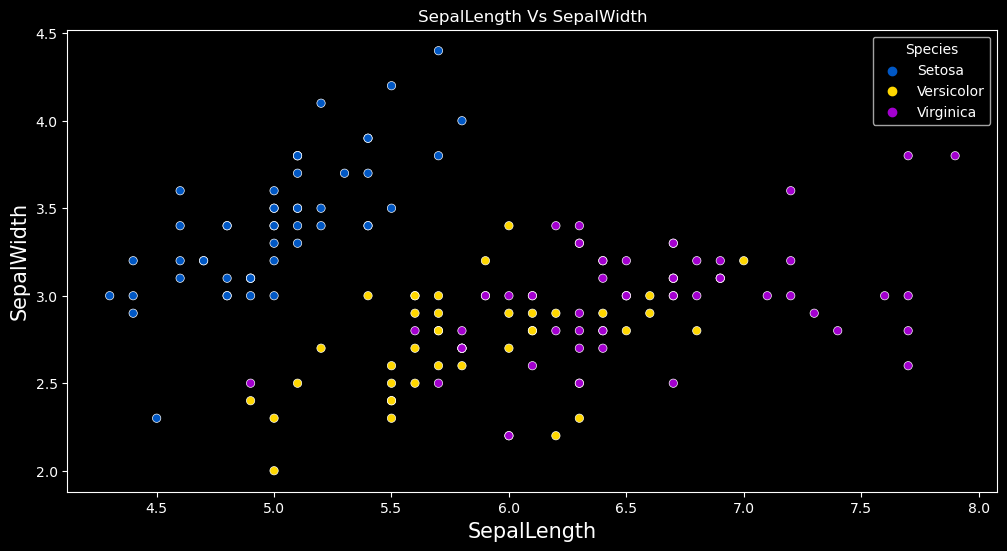

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["SepalLengthCm"] ,data['SepalWidthCm'],hue=data['Species'],palette="prism")
plt.title("SepalLength Vs SepalWidth")
plt.xlabel("SepalLength",fontsize=15)
plt.ylabel("SepalWidth",fontsize=15)
plt.show()

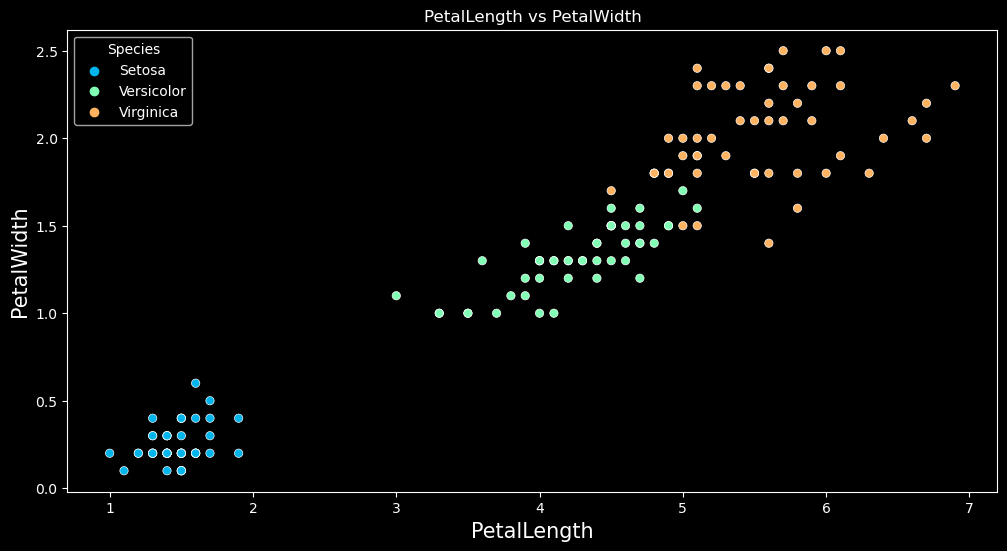

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["PetalLengthCm"] ,data['PetalWidthCm'],hue=data['Species'],palette="rainbow")
plt.title("PetalLength vs PetalWidth")
plt.xlabel("PetalLength",fontsize=15)
plt.ylabel("PetalWidth",fontsize=15)
plt.show()

### Boxplot.

In [13]:
c = 1
colors = ["rainbow","spring","cool","prism"]
x = 0
plt.figure(figsize=(10,10))
for i in data.columns:
    if i!="Species" and i!="Id":
        plt.subplot(2,2,c)
        #sns.boxplot(data[i],color=colors[x%6],)
        sns.boxplot('Species', i, data=data,palette=colors[x%4])
        plt.title(i)
        x = x+1
        c = c+1

## Heatmap.

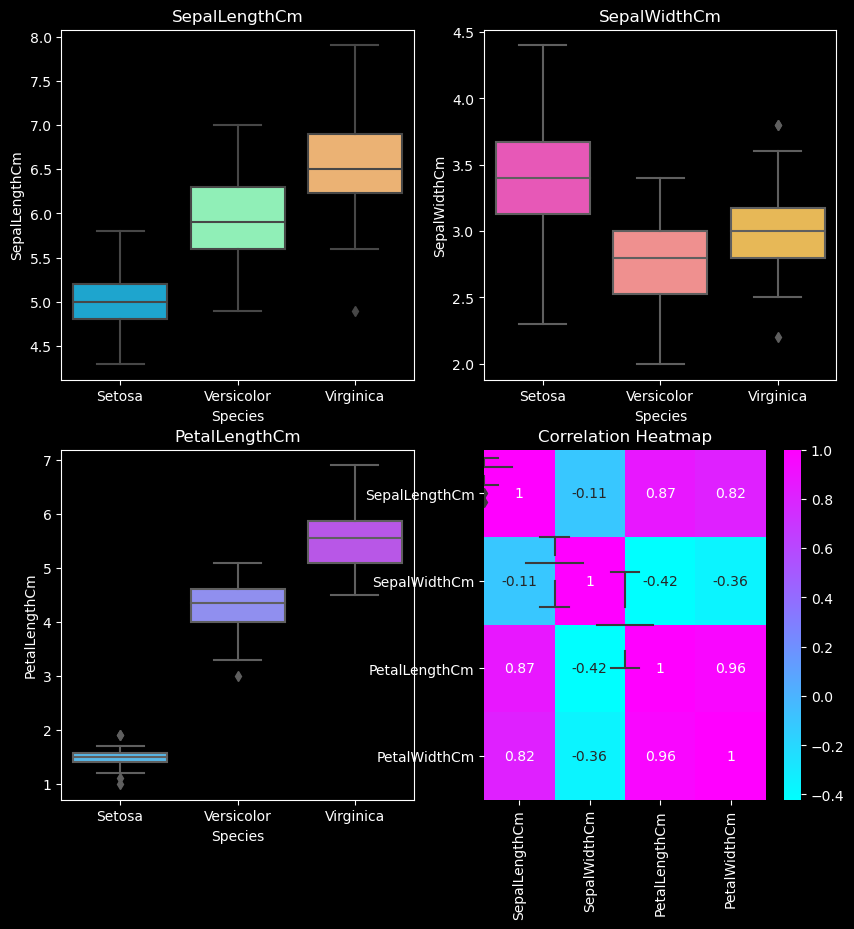

In [14]:
df = data.drop(columns=["Id"])
sns.heatmap(df.corr(), annot=True,cmap="cool")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
Species = ['Setosa', 'Versicolor', 'Virginica']

In [16]:
data["Species"] = data["Species"].replace(['Setosa', 'Versicolor', 'Virginica'],[0,1,2])

In [17]:
X = data.drop(columns=["Id","Species"])
y = data["Species"]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Model Training

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [20]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("DecisionTreeClassifier",DecisionTreeClassifier()))
models.append(("RandomForestClassifier",RandomForestClassifier()))
models.append(("ExtraTreesClassifier",ExtraTreesClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))
models.append(("SVC",SVC()))
models.append(("KNeighborsClassifier",KNeighborsClassifier()))

For LogisticRegression


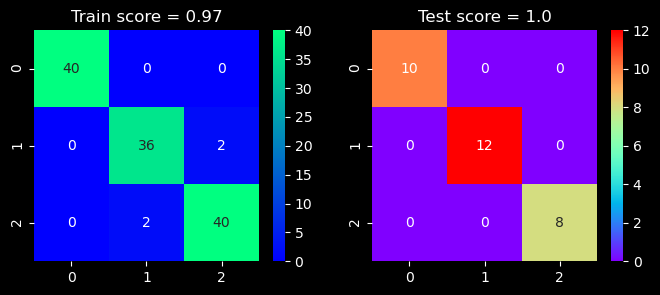

For DecisionTreeClassifier


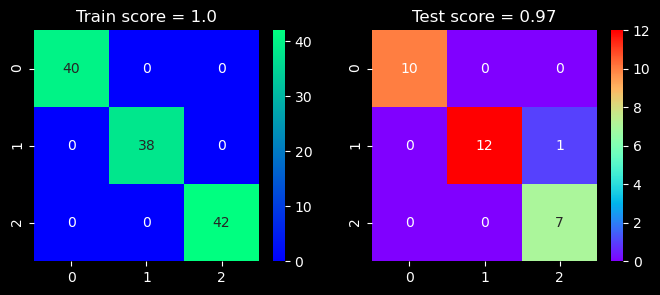

For RandomForestClassifier


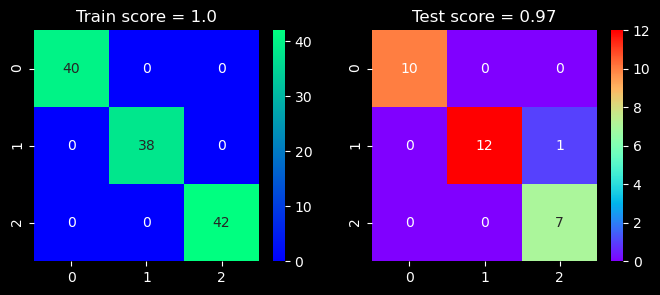

For ExtraTreesClassifier


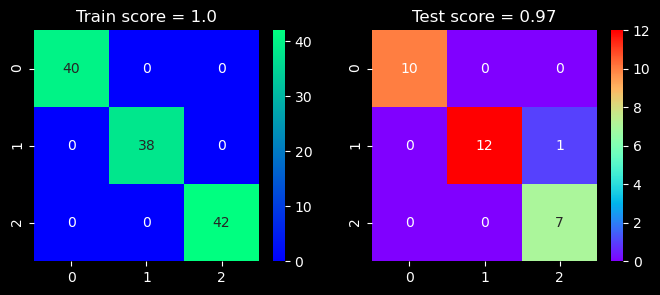

For GradientBoostingClassifier


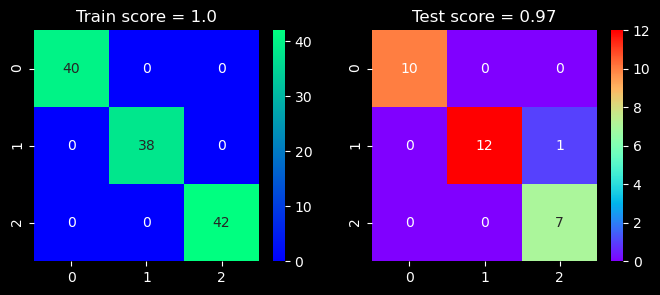

For SVC


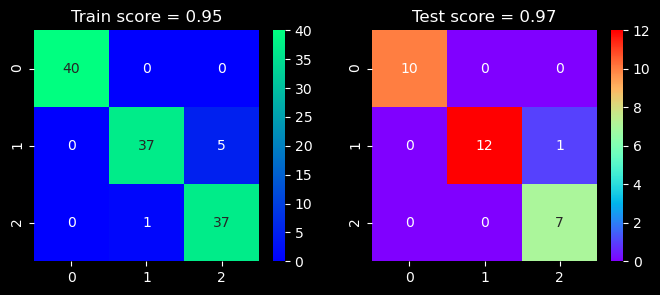

For KNeighborsClassifier


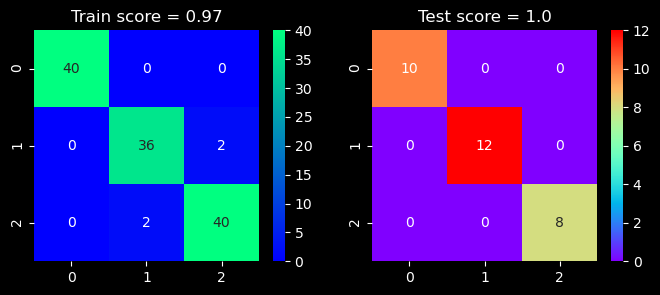

In [21]:
for name, model in models:
    model.fit(x_train,y_train)
    pred1 = model.predict(x_train)
    pred2 = model.predict(x_test)
    print(f'For {name}')
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plt.title("Train score = {}".format(round(model.score(x_train,y_train),2)))
    sns.heatmap(confusion_matrix(pred1,y_train),annot=True,cmap="winter")
    plt.subplot(1,2,2)
    plt.title("Test score = {}".format(round(model.score(x_test,y_test),2)))
    sns.heatmap(confusion_matrix(pred2,y_test),annot=True,cmap="rainbow")
    plt.show()